In [4]:
#Data manipulation imports
import pandas as pd
import numpy as np 


In [5]:
#Data Visulization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#read the csv file
df=pd.read_csv(r'C:\Users\Ramachandra M\Documents\Capstone_project\911.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [11]:
#top 5 zip codes
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [14]:
#top 5 townships
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [19]:
#total unique value count for titles
df['title'].nunique()
#or
len(df['title'].unique())

110

In [21]:
#create a column and split the title based on the naming category
df['reason']=df['title'].apply(lambda title: title.split(":")[0])

In [40]:
# x=df['title'].iloc[0]
# x.split(":")[0]

'EMS'

In [44]:
#make a count of the reason column created
df['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

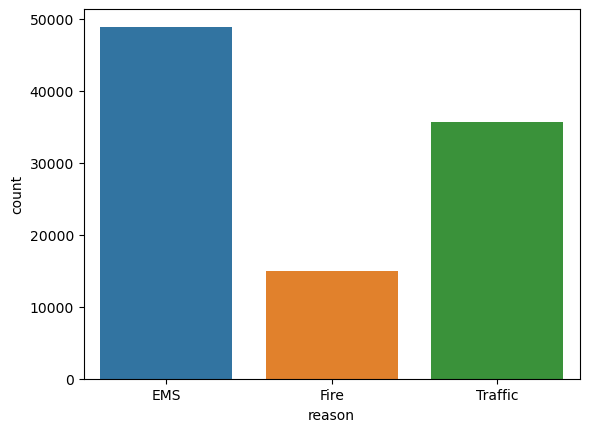

In [47]:
#draw a count plot of the reasons
sns.countplot(x='reason',data=df)

In [48]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
reason        object
dtype: object

In [54]:
#identify the data type of a specific column value
type(df['timeStamp'].iloc[0])

str

In [55]:
#Convert the data type of timestamp from string to DateTime
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [60]:
#seperate the hour, month, day of the week from the timeStamp columns
df['Hour']=df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)

In [62]:
df['Month']=df['timeStamp'].apply(lambda timeStamp:timeStamp.month)

In [64]:
df['Day of Week']=df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [68]:
#create a reference for the Day of the week column
dmap={0:'Mon',
      1:'Tue',
      2:'Wed',
      3:'Thu',
      4:'Fri',
      5:'Sat',
      6:'Sun'}

In [70]:
#assign the value created to the Day of the week
df['Day of Week']=df['Day of Week'].map(dmap)

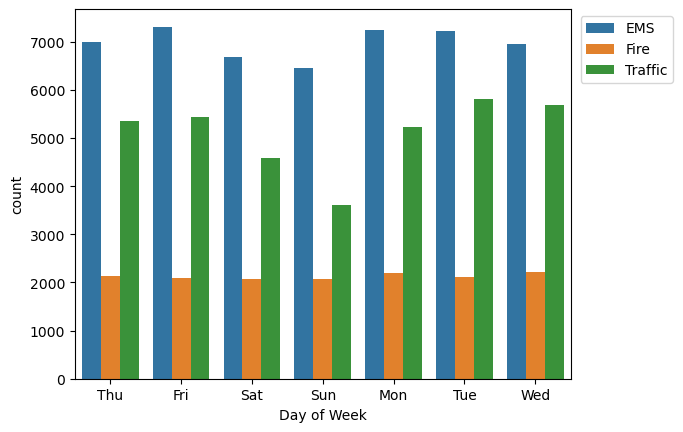

In [87]:
#plot a graph and adjust the legend according to the fit
sns.countplot(x='Day of Week',hue='reason',data=df)
plt.legend(loc=(1.02,0.8))

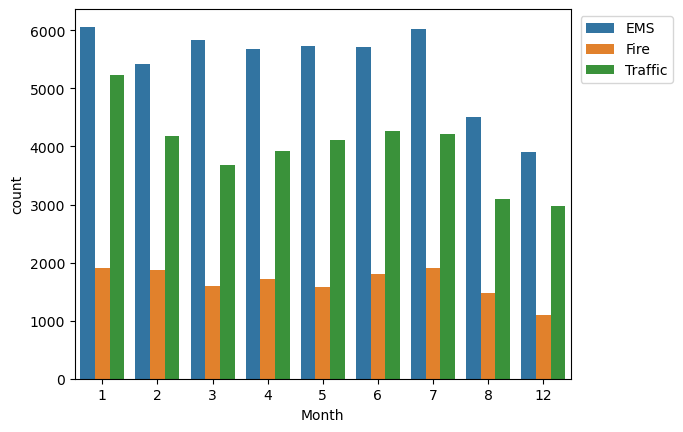

In [89]:
#plot a graph and adjust the legend according to the fit
sns.countplot(x='Month',hue='reason',data=df)
plt.legend(loc=(1.02,0.8))